<a href="https://colab.research.google.com/github/samsomsabu/advanced-machine-learning/blob/main/currency_exchange_rate_prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # used for numerical computing in Python.
import pandas as pd #data manipulation and analysis library.
import matplotlib.pyplot as plt #for creating static, animated, and interactive visualizations in Python.
import seaborn as sns # provides a high-level interface for drawing attractive and informative statistical graphics.
from seaborn import regression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
sns.set() #It sets the aesthetic parameters in one step. This might include setting the visualization style, scale, color palette, and other aesthetics.
plt.style.use('seaborn-whitegrid') #This line sets the style of the plots generated by Matplotlib's pyplot to 'seaborn-whitegrid', which is a predefined style in Seaborn.

<ipython-input-1-5ad4fe361abd>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') #This line sets the style of the plots generated by Matplotlib's pyplot to 'seaborn-whitegrid', which is a predefined style in Seaborn.


**Description about the Dataset**
This dataset contains seven columns, comprising of Date, Open, High, Low, Close, Adj Close, Volume.
1. Open: The opening exchange rate for the given date.
2. High: The highest exchange rate during the day.
3. Low: The lowest exchange rate during the day.
4. Close: The closing exchange rate for the day.
5. Adj Close: The adjusted closing exchange rate, often adjusted for factors like dividends and stock splits.
6. Volume: This refers to the total number of units traded on a given day.

In [ ]:
data = pd.read_csv("/content/PKRX.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-19,162.875946,162.875946,162.875946,162.933914,162.933914,0
1,2021-08-20,163.899994,163.899994,163.223007,162.875946,162.875946,0
2,2021-08-23,163.056580,164.000000,163.056580,162.926483,162.926483,0
3,2021-08-24,162.879486,164.000168,162.879486,164.000000,164.000000,0
4,2021-08-25,163.980621,164.349213,163.980621,164.600006,164.600006,0


Decision Tree Regression:


Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

Discrete output example: A weather prediction model that predicts whether or not there’ll be rain on a particular day.
Continuous output example: A profit prediction model that states the probable profit that can be generated from the sale of a product.

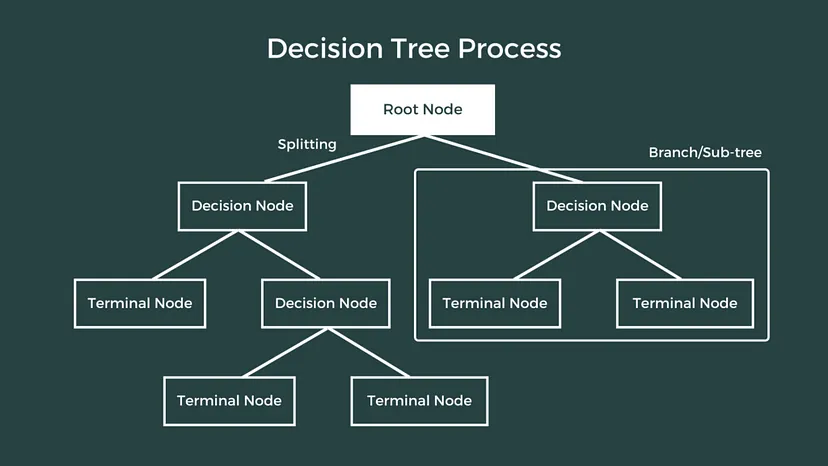

1. Root Node: This represents the topmost node of the tree that represents the whole data points.
2. Splitting: It refers to dividing a node into two or more sub-nodes.
3. Decision Node: They are the nodes that are further split into sub-nodes, i.e., this node that is split is called a decision node.
4. Leaf / Terminal Node: Nodes that do not split are called Leaf or Terminal nodes. These nodes are often the final result of the tree.
5. Branch / Sub-Tree: A subsection of the entire tree is called branch or sub-tree.
6. Parent and Child Node: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of the parent node. In the figure above, the decision node is the parent of the terminal nodes (child).
7. Pruning: Removing sub-nodes of a decision node is called pruning. Pruning is often done in decision trees to prevent overfitting.

# **How does a Decision Tree work?**
The process of splitting starts at the root node and is followed by a branched tree that finally leads to a leaf node (terminal node) that contains the prediction or the final outcome of the algorithm. Construction of decision trees usually works top-down, by choosing a variable at each step that best splits the set of items. Each sub-tree of the decision tree model can be represented as a binary tree where a decision node splits into two nodes based on the conditions.

Decision trees where the target variable or the terminal node can take continuous values (typically real numbers) are called regression trees which will be discussed in this lesson. If the target variable can take a discrete set of values these trees are called classification trees.

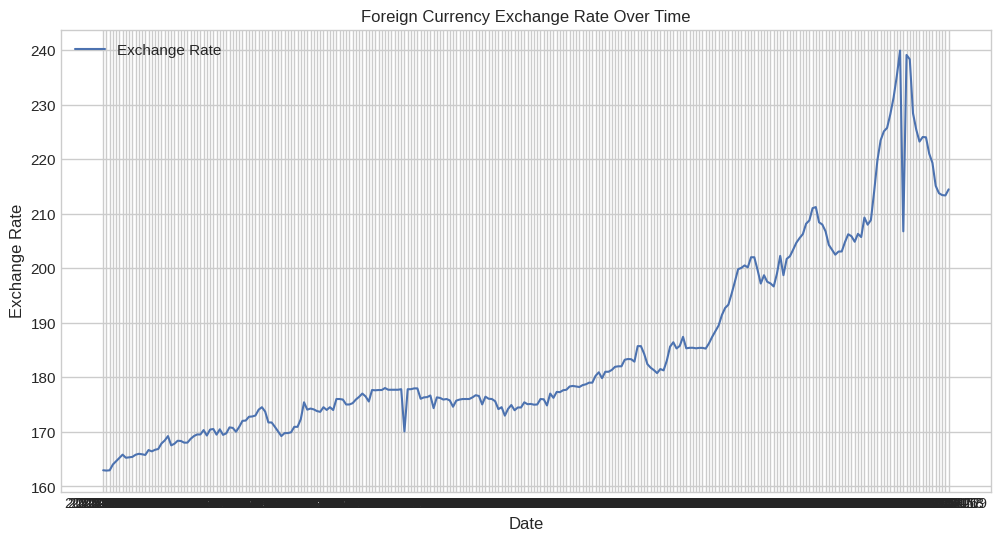

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Exchange Rate')
plt.title('Foreign Currency Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


From the graph, it can be observed that the exchange rate experienced fluctuations over time. The exchange rate started at around 160, then reached its peak at 240, and later fluctuated between 180 and 220 before ending close to 200. This indicates notable volatility in the exchange rate during the time period being analyzed.

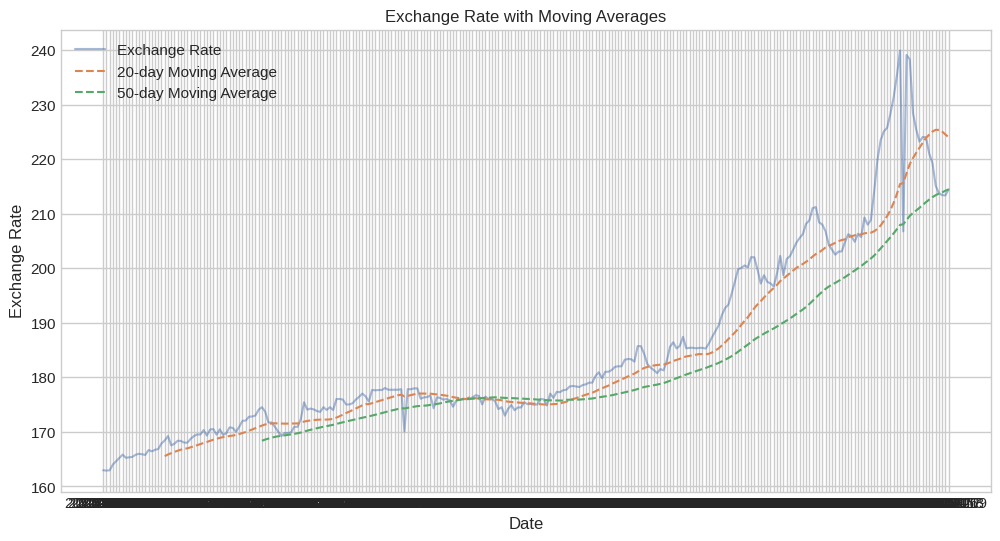

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Exchange Rate', alpha=0.5)
plt.plot(data['Date'], data['Close'].rolling(window=20).mean(), label='20-day Moving Average', linestyle='--')
plt.plot(data['Date'], data['Close'].rolling(window=50).mean(), label='50-day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate with Moving Averages')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(title='Candlestick Chart for Exchange Rate',
                  xaxis_title='Date',
                  yaxis_title='Exchange Rate')
fig.show()


<ipython-input-142-447603b6d7a4>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-142-447603b6d7a4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.998531  0.988482  0.991488   0.991488     NaN
High       0.998531  1.000000  0.987730  0.992667   0.992667     NaN
Low        0.988482  0.987730  1.000000  0.978092   0.978092     NaN
Close      0.991488  0.992667  0.978092  1.000000   1.000000     NaN
Adj Close  0.991488  0.992667  0.978092  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


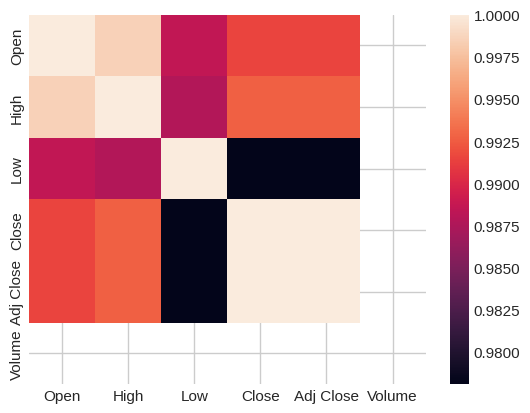

In [ ]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [ ]:
X = data[["Open", "High", "Low"]]
y = data["Close"]
X = X.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = dt_model.predict(X_test)

In [ ]:
data = pd.DataFrame(data={"Predicted Rate": y_pred_test.flatten()})
print(data.head())

   Predicted Rate
0      206.750000
1      206.750000
2      199.699997
3      181.250000
4      172.306259


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error for Test set: {mse}')
r2 = r2_score(y_test, y_pred_test)
print(f'R-squared: {r2}')

Mean Squared Error for Test set: 43.014179638127196
R-squared: 0.8839648994774815


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor
dt_model = DecisionTreeRegressor()

# Define the hyperparameters and their possible values for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred_test_params = best_model.predict(X_test)

# Calculate the Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred_test_params)
print("Mean Squared Error on Test set:", mse)


Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean Squared Error on Test set: 23.597508616746016


In [ ]:
data = pd.DataFrame(data={"Predicted Rate": y_pred_test_params.flatten()})
print(data.head())

   Predicted Rate
0      206.750000
1      206.521591
2      199.699997
3      181.358327
4      172.742991


****Summary****

**Random Forest**
Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.
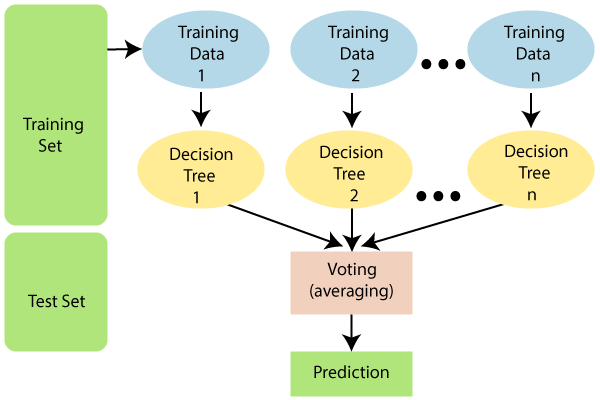

In [ ]:
data_rand = pd.read_csv("/content/PKRX.csv") #Loading the dataset to data_rand variable
print(data_rand.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-08-19  162.875946  162.875946  162.875946  162.933914  162.933914   
1  2021-08-20  163.899994  163.899994  163.223007  162.875946  162.875946   
2  2021-08-23  163.056580  164.000000  163.056580  162.926483  162.926483   
3  2021-08-24  162.879486  164.000168  162.879486  164.000000  164.000000   
4  2021-08-25  163.980621  164.349213  163.980621  164.600006  164.600006   

   Volume  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
data_rand.info() #Displayig the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [ ]:
data_rand.head(5) #Displaying the contents

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-19,162.875946,162.875946,162.875946,162.933914,162.933914,0
1,2021-08-20,163.899994,163.899994,163.223007,162.875946,162.875946,0
2,2021-08-23,163.056580,164.000000,163.056580,162.926483,162.926483,0
3,2021-08-24,162.879486,164.000168,162.879486,164.000000,164.000000,0
4,2021-08-25,163.980621,164.349213,163.980621,164.600006,164.600006,0


In [ ]:
data_rand.isnull().sum() #Checking for any missing values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#These columns represent different aspects of currency exchange rates. Open is the opening rate for that day. High is the highest rate for the day
#Low is the lowest value for the day
#The target is close, which is the Closing exchange rate for the day.
# Converting data to NumPy arrays can make the code more consistent.
X = data_rand[["Open", "High", "Low"]]
y = data_rand["Close"]
X = X.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

RandomForestRegressor:
This is the Random Forest Regressor model from scikit-learn.

n_estimators=100: This parameter sets the number of trees in the forest to 100.

random_state=42: Similar to the train-test split, this parameter ensures reproducibility of results.
fit: This method trains the Random Forest model on the training data.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#Xtrain and ytrain: These are the training features and target variable, respectively.
#predict: This method is used to make predictions on the test set.
#Xtest: These are the features of the test set for which predictions are made.
#y_pred_test: This variable holds the predicted values for the test set.

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(Xtrain, ytrain)
y_pred_test = rf_model.predict(Xtest);


<ipython-input-152-f5f20b9b92a3>:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(ytest, y_pred_test)
print(f'Mean Squared Error for Test set: {mse}')
r2 = r2_score(ytest, y_pred_test)
print(f'R-squared: {r2}')

Mean Squared Error for Test set: 21.642739429866854
R-squared: 0.9416165211924378


predicted exchange rate for a specific instance in the test set

In [ ]:
data = pd.DataFrame(data={"Predicted Rate": y_pred_test.flatten()})
print(data.head())

   Predicted Rate
0      215.771893
1      206.031888
2      198.122552
3      181.896470
4      172.968826


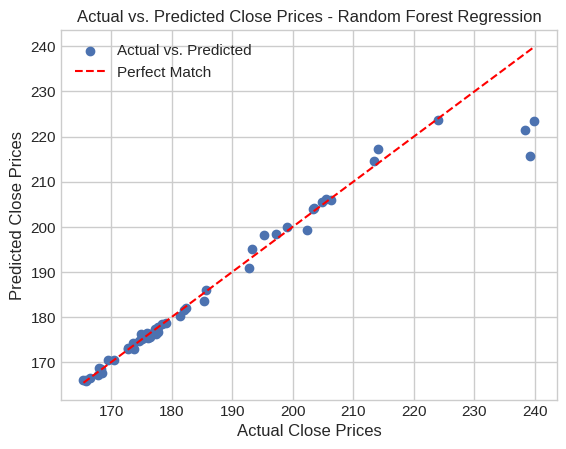

In [ ]:
plt.scatter(ytest, y_pred_test, label='Actual vs. Predicted')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], '--', color='red', label='Perfect Match')

plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Actual vs. Predicted Close Prices - Random Forest Regression')
plt.legend()
plt.show()

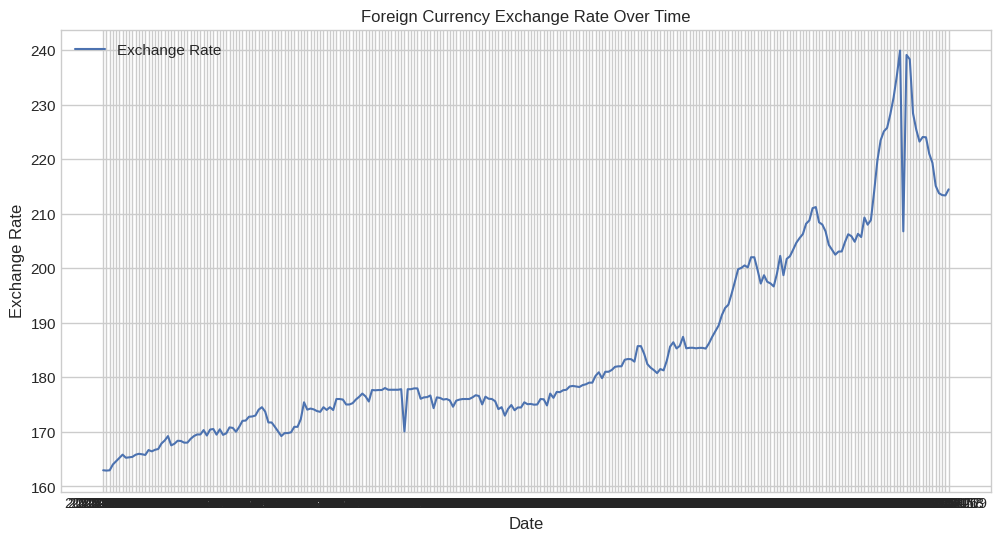

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_rand['Date'], data_rand['Close'], label='Exchange Rate')
plt.title('Foreign Currency Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

KNN:
The dataset consists of historical currency exchange rate information for Pakistan, encompassing features such as opening, high, and low rates, along with closing rates. Each record represents a specific date, capturing the financial dynamics of the currency over time. The dataset is designed for predictive modeling tasks, aiming to forecast future closing exchange rates based on historical patterns.

In [ ]:
#We are inputing the data
data_KNN = pd.read_csv("/content/PKRX.csv")

In [ ]:
data_KNN.head()#Displaying the fist 5 rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-19,162.875946,162.875946,162.875946,162.933914,162.933914,0
1,2021-08-20,163.899994,163.899994,163.223007,162.875946,162.875946,0
2,2021-08-23,163.056580,164.000000,163.056580,162.926483,162.926483,0
3,2021-08-24,162.879486,164.000168,162.879486,164.000000,164.000000,0
4,2021-08-25,163.980621,164.349213,163.980621,164.600006,164.600006,0


In [ ]:
data_KNN.info()#Displaying information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [ ]:
data_KNN.isnull().sum()#Finding the missing values.

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#Importing the necessay libraries for KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#These columns represent different aspects of currency exchange rates. Open is the opening rate for that day. High is the highest rate for the day
#Low is the lowest value for the day
#Close is the target
X = data_KNN[["Open", "High", "Low"]]
y = data_KNN["Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN Regressor model (example with k=5)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(ytest,predictions )
print(f'R-squared: {r2}')


Mean Squared Error: 12.815929919954181
R-squared: 0.9654277326904245


In [ ]:
data = pd.DataFrame(data={"Predicted Rate": predictions.flatten()})
print(data.head())

   Predicted Rate
0      223.416806
1      206.335501
2      197.944772
3      182.239999
4      173.355795


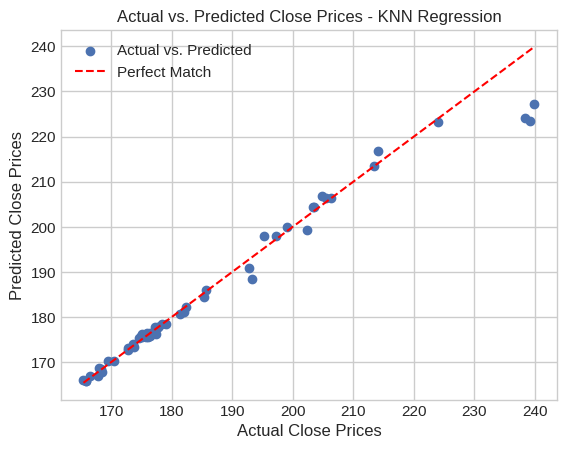

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, predictions, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Match')

plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Actual vs. Predicted Close Prices - KNN Regression')
plt.legend()
plt.show()
